$Kode \space : \space C++\space \space \space , \space \space \space  Dato \space : \space 21.10.2019 \space \space \space , \space\space\space Emne \space : \space Fys3150\space \space \space , \space \space \space Navn \space : \space Roshan \space Azam \space , \space Erlend \space Akre $

## Numerical integration

### Abstrakt

I dette prosjektet tar vi for oss numerisk integrasjon ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: 

Sist men ikke minst har vi laget et GitHub repository som inneholder kildekoden som vi har utviklet i dette projektet, i tillegg til et par håndplukkede resultater som skal brukte til å forsøke å vise at koden virker som den skal. GitHub repositoriet skal også vise en ganske detaljert logg av utviklingen av koden. GitHub repositoriet finner du her:

[https://github.com/Erlendak/FYS3150_Project_3](https://github.com/Erlendak/FYS3150_Project_3)

Hvis du ønsker å clone reposetory kan du bruke denne lenken: 

[https://github.com/Erlendak/FYS3150_Project_3.git](https://github.com/Erlendak/FYS3150_Project_3.git)


### Introduksjon

$$\space $$
I dette projektet tar vi for oss et helium atom, der elektronene er i laveste energitilstand. Vi ønsker å avgjøre hvordan korrelasjonen av energien påvirker elektronene. Dette kan vi estimere ved hjelp av Schrødingers likninger og interaksjonen mellom dem. Dette vil gi oss en 6-dimensjonal funksjon som vi må integrere numerisk for å få resultater. I dette prosjektet er vi ikke opptatt av den fysiske delen eller hva som skjer med atomet, men vi er heller opptatt av hvordan vi modelerer og integrerer dette problemet numerisk og hvordan våre integrasjonsmetoder oppfører seg, hvor effektive de er og hvilke som gir best resultater. 

Vi bruker to metoder for å integerere funksjonen: Gauss metoden, som er en lav-dimensjons metode der vi tar i bruk Legendre polynomer. Og Monte-Carlo som er en høy-dimensjons metode, der vi bruker uniform distribusjon. Så prosjektet vårt koker ned til å løse en 6-dimensjonal funksjon med forskjellige metoder og se hvilken som er best gir best resultater. Dette gjør vi først direkte uten noen forhåndsregninger og i kartesiske koordinater, dette blir kalt en brute force måte å løse problemet på.

Vi vil så effektivisere de to integrasjonsmetodene våre, dette har vi tenkt til å gjøre ved å bytte koordinatsystem slik at funksjonen vår er i polar-koordinater istedenfor i kartesiske koordinater. I tillegg til dette kan vi endre polynomene som vi bruker i Gauss metoden til Laguerre polynomer, og endre distrubisjonen vi bruker i Monte-Carlo til eksponential distrubisjon. Med dette burde vi få fire sett med metoder, der to av dem er brute force og to er forbedrede versioner av metodene. Vi vil også parallellisere Monte-Carlo metodene for å se hvor mye mer effektiv metoden blir.



### - Fysisk problem

I dette projektet tar vi for oss et helium atom, der elektronene er i laveste energitilstand. Vi ønsker å avgjøre hvordan korrelasjonen av energien påvirker elektronene. Dette kan vi estimere ved hjelp av Schrødingers likninger og interaksjonen mellom dem. I dette prosjektet er vi ikke like opptatt av den fysikken, men vi er mer opptatt av hvordan integrasjonsmetodene våre oppfører seg, hvilken som gir de beste resultatene og hvor effektive metodene våre er. Så prosjektet vårt koker ned til å løse en 6-dimensjonal funksjon med forskjellige metoder. 

### - Brute Force Gauss-Legendre

Vi begynner med å direkte regne ut integrasjonen av funksjonen numerisk ved hjelp av Gauss-Legendres metode, uten å gjøre noen forhåndsregninger. Gauss-Legendres metode er en lite effektiv metode som bruker svært lang tid til å få gode resultater, spesielt når vi skal bruke denne til å integrere over 6 dimsensjoner. På grunn av at metoden regner integralet ut direkte uten å gjøre forhåndsregninger, blir den kalt en brute force metode. Metoden er relavtivt simpel og rett frem, men den krever mange utregninger og vi forventer at den bruker mye tid for å få resultater, og selv da forventer vi ikke å få et tilfredsstillende svar.   

### - Laguerres metode

Gauss-Laguerres metode er en mer effektiv metode enn Brute Force Gauss-Legendre. Vi skifter fra kartesiske koordinater til polar-koordinater. I tillegg kan vi bruke Laguerre polynomer for å regne ut radiusen, som gir et bedre resultater. Dette er fordi Laguerre polynomer er definert i 0 til uendelig, så det blir lettere å approksimere uendelig med Laguerre. Vi så la vinkelene finne ut vinklene, dette kan vi gjøre på forskjellige måter, men vi velger å bruke Lagendre polynomer. Alt dette vil resultere i en raskere og mer effektiv kode. Eventuelt kan vi bruke større oppløsning for å få mer presise svar. 

### - Brute Force Monte Carlo

Vi bruker Monte Carlo metoden. Funksjonen som vi har er en 6-dimensjonal funksjon, dette er på grensen til hva vanlige Gauss kan klare. Men Monte Carlo metoden fungerer bra for funksjoner av høyere dimensjon. Vi setter opp en Brute Force MC metode der vi igjen beregner funksjonen direkte, i kartesiske koordinater. Vi bruker en uniform distribusjon, men vi merker at denne krever at N er veldig stor og selv da får vi ikke tilfredsstillende resultater.

### - Improved Monte Carlo

Vi effektiviserer Monte Carlo metoden vår. Vi gjør funksjonen som vi integrerer om til polarkoordinater. Vi bruker så eksponensial distrubisjon for å regne ut integralet av radiusen og uniform distribusjon for theta og phi. Siden vi bruker uniform distribusjon vil en del av utrykket absorberes som gjør at vi kan forhåndsregne en del av funksjonen. Med alt dette forventer vi en mye mer effektiv metode enn Brute Force Monte Carlo.

### - Effektivisering

Til slutt parallelliserer vi koden vår med OpenMP. Vi parallelliserer Brute Force MC og Improved MC for å se hvor mye fortere koden går.

### - Unit tests
Til slutt har vi også lagt til unit tests for å sjekke at alt i programmet fungerer som det skal. Vi har laget en unit test for å se at hver av metodene våre gir riktige resultater for noen simple integraler som vi har den analytiske løsningen til.



I tillegg til dette kan den være ustabil, slik at vi må teste med forskjelle N-verdier for å komme nærmere svaret, en større N gir nødvendigvis ikke et bedre resultat.

# Formalisme

Vi starter med å modelere bløgefunksjonen til elektronene $e_i$ i tilstanden s1, da kan vi tilnærme posisjonen til elektronene på dimensjonsløs form ; 

$$ {\bf r}_i =  x_i {\bf e}_x + y_i {\bf e}_y +z_i {\bf e}_z  $$

Siden vi ser på energitilstanden 1s så gir det oss bølgefunksjonen ;

$$ \psi_{1s}({\bf r}_i)  =   e^{-\alpha r_i},$$

her $ \alpha $ er en parameter som tilsvarer atomkjernens ladning, vi tar for oss helium atomer og setter dermed $\alpha$ til 2. Distansen fra atomet til det aktuelle elektronet uttrykes ved $r_i = \sqrt{x_i^2+y_i^2+z_i^2} $.

Siden vi ser på et helum atom så vil vi ha to elektroner, hvor vi antar at begge er i energitilstanden 1s. Dette gjør at når vi skal se på bølgefunksjonen til massesenteret til elektronene gir det oss produktet av hver av elektronenes separate bølgefunksjoner uttryket ved ; 

$$\Psi({\bf r}_1,{\bf r}_2)  =   e^{-\alpha (r_1+r_2)}.$$

Hvis vi så implementerer frastøtende interaksjoner mellom elektronene, uttrykket er fortsatt ikke normalisert, men vi ser bort fra dette under dette projeketet.

$$ \langle \frac{1}{|{\bf r}_1-{\bf r}_2|} \rangle = \int_{-\infty}^{\infty} d{\bf r}_1d{\bf r}_2  e^{-2\alpha (r_1+r_2)}\frac{1}{|{\bf r}_1-{\bf r}_2|} $$

### Laguerres metode 

Legendre metode er en svært tung metode, så vi kan skrive om uttrykket slik at vi kan bruke Laguerre. Dette gjør at vi går fra å integrere x $\in[-1,1]$ til å se på x$\in [0,\infty)$. Da må vi skrive om fra kartesiske kordinater til sfæriske kordinater.  

$$ d{\bf r}_1d{\bf r}_2  = r_1^2dr_1 r_2^2dr_2 dcos(\theta_1)dcos(\theta_2)d\phi_1d\phi_2, $$

Dette gir oss ; 

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle = \int_{-\infty}^{\infty}  e^{-2\alpha (r_1+r_2)}\frac{1}{r_{12} } $$

$$ \frac{1}{r_{12}}= \frac{1}{\sqrt{r_1^2+r_2^2-2r_1r_2cos(\beta)}} $$

$$ cos(\beta) = cos(\theta_1)cos(\theta_2)+sin(\theta_1)sin(\theta_2)cos(\phi_1-\phi_2)) $$

Dette gir oss ;

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \int_0^{\infty} r_1^2dr_1 \int_0^{\infty}r_2^2dr_2 \int_0^{\pi}dcos(\theta_1)\int_0^{\pi}dcos(\theta_2)\int_0^{2\pi}d\phi_1\int_0^{2\pi}d\phi_2  \frac{\exp{-2\alpha (r_1+r_2)}}{r_{12}}$$


Så kan vi skrive om $dCos(\theta_1)$ og $dCos(\theta_2)$ til $Sin(\theta_1)d\theta_1$ og $Sin(\theta_1)d\theta_2$ 

Dette gir oss ; 

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \int_0^{\infty} r_1^2dr_1 \int_0^{\infty}r_2^2dr_2 \int_0^{\pi}Sin(\theta_1)d\theta_1\int_0^{\pi}Sin(\theta_2)d\theta_2\int_0^{2\pi}d\phi_1\int_0^{2\pi}d\phi_2  \frac{\exp{-2\alpha (r_1+r_2)}}{r_{12}}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \int_0^{\infty} r_1^2dr_1 \int_0^{\infty}r_2^2dr_2 \int_0^{\pi}Sin(\theta_1)d\theta_1\int_0^{\pi}Sin(\theta_2)d\theta_2\int_0^{2\pi}d\phi_1\int_0^{2\pi}d\phi_2  \frac{\exp{-2\alpha (r_1+r_2)}}{r_{12}}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}$$

Absorbening ;

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}, \hspace{2cm} \cdot| \bigg(r_1^2 e^{-r_1}  r_2^2 e^{-r_2} \bigg)^{-1}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}, \hspace{2cm} \cdot| \bigg(r_1^2  r_2^2 e^{-r_2 -r_1} \bigg)^{-1}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}, \hspace{2cm} \cdot| \bigg(r_1^2  r_2^2 e^{-(r_1 +r_2)} \bigg)^{-1}$$

$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  = \frac{ r_1^2 r^2_2 Sin(\theta_1) Sin(\theta_2)\frac{e^{-2\alpha (r_1+r_2)}}{r_{12}}}{r_1^2  r_2^2 e^{-(r_1 +r_2)}}$$
$$ \bigg\langle \frac{1}{ r_{12} } \bigg\rangle  =  Sin(\theta_1) Sin(\theta_2) \frac{e^{-2\alpha (r_1+r_2)}}{ e^{-(r_1 +r_2)}}  \frac{1}{r_{12}}$$

$$ Sin(\theta_1) Sin(\theta_2) e^{-2\alpha (r_1+r_2)} e^{(r_1 +r_2)}  \frac{1}{r_{12}}$$

$$ Sin(\theta_1) Sin(\theta_2) e^{(-2\alpha (r_1+r_2))+(r_1 +r_2)}  \frac{1}{r_{12}}$$

$$ Sin(\theta_1) Sin(\theta_2) e^{(r_1+r_2)(-2\alpha + 1)}  \frac{1}{r_{12}}$$
 Og siden $\alpha$ er 2 så gir dette oss ;
 
$$\underline{ \underline{ Sin(\theta_1) Sin(\theta_2) e^{-3(r_1+r_2)}  \frac{1}{r_{12}}}} $$

### Brute Force Monte Carlo

### Importance Sampling Monte Carlo 



### Resultat

### Resultater fra bjelke

| Egenverdi N = 200 | Analytisk | Toleranse ; $1\cdot10^{-1}$  | Toleranse ; $1\cdot10^{-8}$  | Toleranse ; $1\cdot10^{-12}$ | Armadillo |
| --- | --- | --- |--- |--- |--- |
| $\lambda_1$ | 9.77144 | 9. 7715 |9. 7714 |  9. 7714 | 9. 7714 |
| $\lambda_2$ | 39.0834 | 39. 083 |39. 083 | 39. 083 |39. 083 |
| $\lambda_3$ | 87.9287 | 87. 929 |87. 929 | 87. 929 | 87. 929 |
| $\lambda_4$ | 156.295 | 156. 30 |156. 30 | 156. 30 |  156. 30 | 
| $\lambda_5$ | 244.167 | 244. 17 |244. 17 | 244. 17 | 244. 17 |
| Tid         |    0 s    | 15. 354 s |22. 969 s | 25. 474 s | 0.111 s |
| Iterasjoner |    200    | 47 266 |70 859  | 78 685 | - |


### Resultater fra ett elektron

### Resultater fra to elektroner

For wr =0.25 får vi første egenverdi 1.2500e+000.

## Diskusjon

## Konklusjon

## Referanser


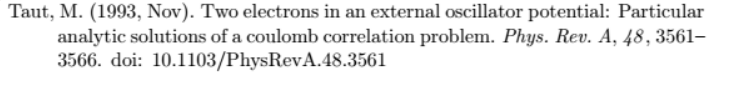
$ \hspace{5cm}$[https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561)

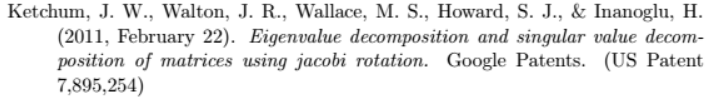

$\hspace{5cm} $[https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf](https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf)

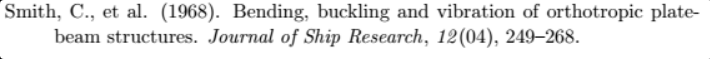

$\hspace{5cm} $[https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249](https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249)